In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

--- 
# Ejercicio 2: Reducción de dimensionalidad

In [2]:
archivo_csv = 'MNIST_dataset.csv'
data = pd.read_csv(archivo_csv)
X = data.iloc[:, 1:].values 

---
### A)

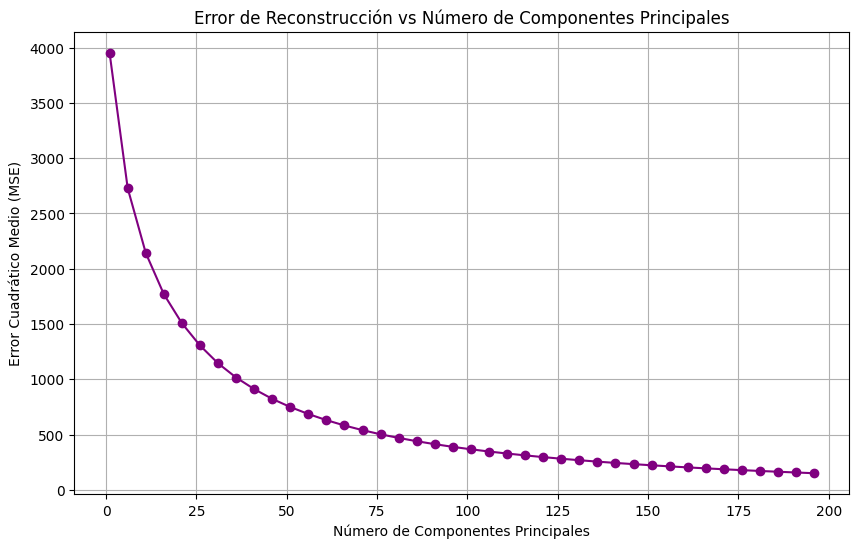

In [14]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered, rowvar=False) 
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1] 
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

mse_n_components_list = range(1, 201, 5) 
mse_list = []

for n_components in mse_n_components_list:
    selected_eigenvectors = eigenvectors[:, :n_components]
    X_reduced = X_centered @ selected_eigenvectors
    X_reconstructed = X_reduced @ selected_eigenvectors.T
    mse = np.mean((X_centered - X_reconstructed) ** 2)
    mse_list.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(mse_n_components_list, mse_list, marker='o', linestyle='-', color='purple')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Error de Reconstrucción vs Número de Componentes Principales")
plt.grid()
plt.show()

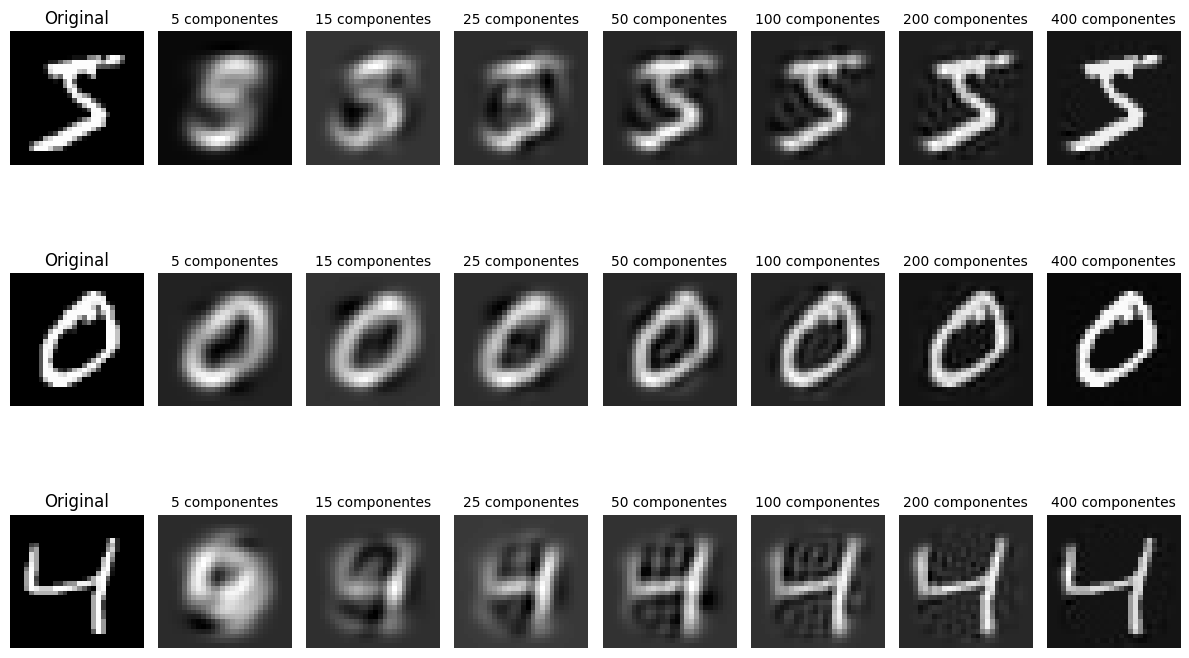

In [18]:

original_images = [X[i].reshape(28, 28) for i in range(3)]
n_components_list = [5, 15, 25, 50, 100, 200, 400]

plt.figure(figsize=(12, 8))
for img_idx, original_image in enumerate(original_images):
    plt.subplot(3, len(n_components_list) + 1, img_idx * (len(n_components_list) + 1) + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    for i, n_components in enumerate(n_components_list):
        selected_eigenvectors = eigenvectors[:, :n_components]
        image_reduced = X_centered[img_idx] @ selected_eigenvectors
        image_reconstructed = image_reduced @ selected_eigenvectors.T
        image_reconstructed += np.mean(X, axis=0) 
        image_reconstructed = image_reconstructed.reshape(28, 28)
        plt.subplot(3, len(n_components_list) + 1, img_idx * (len(n_components_list) + 1) + i + 2)
        plt.imshow(image_reconstructed, cmap='gray')
        plt.title(f'{n_components} componentes', fontsize=10)
        plt.axis('off')
plt.tight_layout()
plt.show()


---
### B)

Para escoger un valor para $n$ se analizó la varianza acumulada; queriendo obtener un buen número. Es por eso que se buscó cuáles son los mínimos $n$ con los cuales se retiene el 85%, 90% y 95% de la varianza acumulada. 

Número mínimo de componentes para retener el 85% de la varianza: 59
Número mínimo de componentes para retener el 90% de la varianza: 87
Número mínimo de componentes para retener el 95% de la varianza: 154


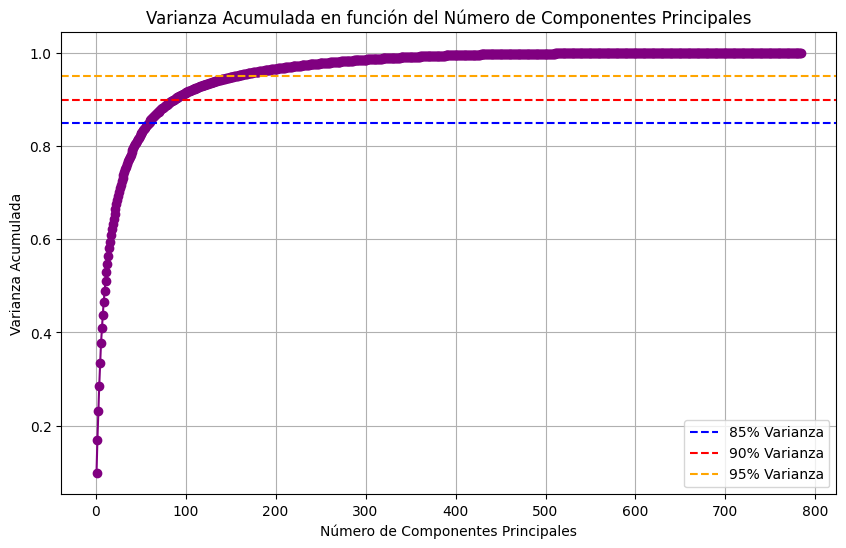

In [16]:
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components_85 = np.argmax(cumulative_variance_ratio >= 0.85) + 1
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Número mínimo de componentes para retener el 85% de la varianza: {n_components_85}")
print(f"Número mínimo de componentes para retener el 90% de la varianza: {n_components_90}")
print(f"Número mínimo de componentes para retener el 95% de la varianza: {n_components_95}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='purple')
plt.axhline(y=0.85, color='b', linestyle='--', label='85% Varianza')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Varianza')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% Varianza')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada en función del Número de Componentes Principales")
plt.legend()
plt.grid()
plt.show()


#### Elegimos un porcentaje para la varianza acumulada, en este caso 90%, y tomamos el $n$ mínimo con el que se logra retener ese porcentaje, en el caso de 90% este es 87. Se escogió este valor porque se retienen las características más significativas del set de datos reduciendo simultaneamente la dimensionalidad. 

#### Así se ve la reconstrucción con el $n$ mínimo tal que se retiene el 90% de la varianza. 

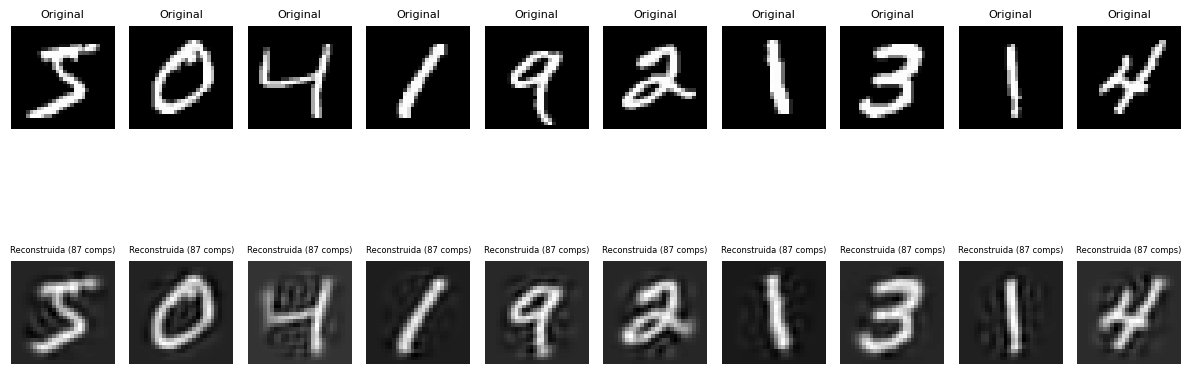

In [15]:
n_components = 87
selected_eigenvectors = eigenvectors[:, :n_components]

X_reduced = X_centered[:10] @ selected_eigenvectors

X_reconstructed = X_reduced @ selected_eigenvectors.T
X_reconstructed += np.mean(X, axis=0)  

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title("Original", fontsize=8)
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title(f"Reconstruida ({n_components} comps)", fontsize=6)
    plt.axis('off')
plt.tight_layout()
plt.show()


Si se quisiera retener otro porcentaje, sea mayor o menor, se puede hacer este mismo análisis.